## Machine Learning Models
### Linear Regression

In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
# Read in the clean csv
listings_df = pd.read_csv("Resources/clean_nyc_listings.csv")
listings_df.head()

,id,name,host_id,host_name,borough,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,availability_365
0,77765,Superior @ Box House,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73777,-73.95366,Hotel room,308,2,42,2022-07-18,217
1,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64529,-73.97238,Private room,299,30,9,2018-10-19,356
2,45910,Beautiful Queens Brownstone! - 5BR,204539,Mark,Queens,Ridgewood,40.70309,-73.89963,Entire home/apt,425,30,13,2019-11-12,365
3,45936,Couldn't Be Closer To Columbia Uni,867225,Rahul,Manhattan,Morningside Heights,40.80630,-73.95985,Private room,75,31,135,2022-07-11,219
4,80493,Cozy room in East Village with AC,434987,Jennifer,Manhattan,East Village,40.72322,-73.98615,Private room,55,2,207,2022-08-13,132


In [3]:
listings_df.dtypes

id                     int64
name                  object
host_id                int64
host_name             object
borough               object
neighborhood          object
latitude             float64
longitude            float64
room_type             object
price                  int64
minimum_nights         int64
number_of_reviews      int64
last_review           object
availability_365       int64
dtype: object

<AxesSubplot:xlabel='Borough', ylabel='Listings Count'>

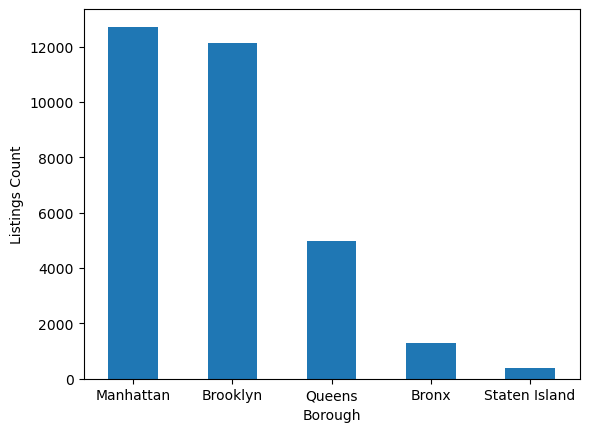

In [4]:
# Create bar plot to visualize frequency of each borough
listings_df['borough'].value_counts().plot(kind='bar', xlabel='Borough', ylabel='Listings Count', rot=0)

<AxesSubplot:xlabel='Room Type', ylabel='Listings Count'>

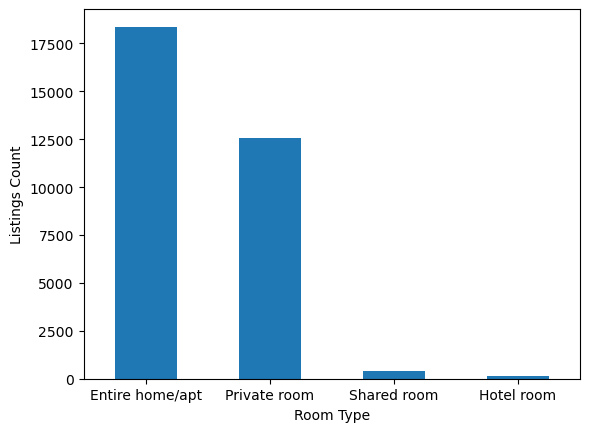

In [5]:
# Create bar plot to visualize frequency of each room type
listings_df["room_type"].value_counts().plot(kind='bar', xlabel="Room Type", ylabel='Listings Count', rot=0)

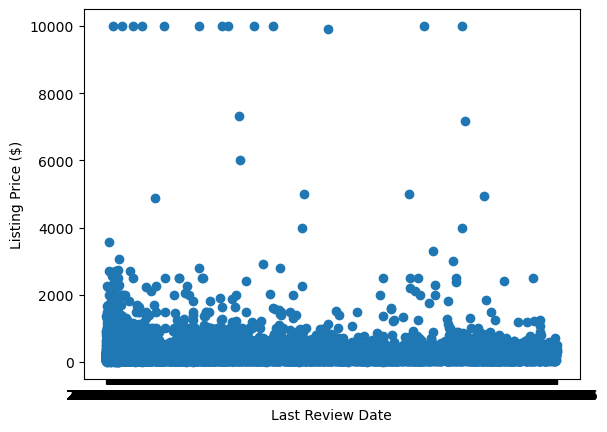

In [6]:
# Visually inspect the relationship between Last Review Date and Price:
plt.scatter(listings_df.last_review, listings_df.price)
plt.xlabel("Last Review Date")
plt.ylabel("Listing Price ($)")
plt.show()

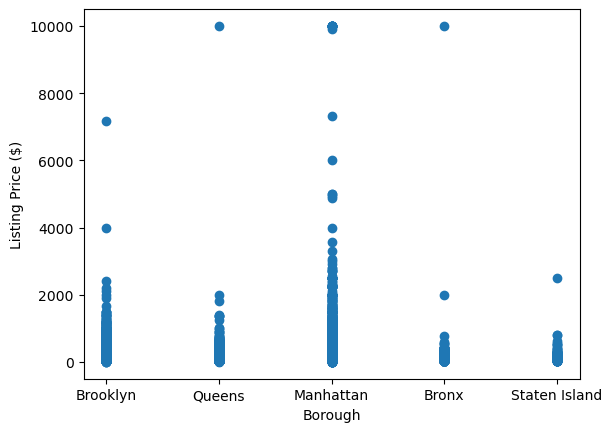

In [7]:
# Visually inspect the relationship between Borough and Price:
plt.scatter(listings_df.borough, listings_df.price)
plt.xlabel("Borough")
plt.ylabel("Listing Price ($)")
plt.show()

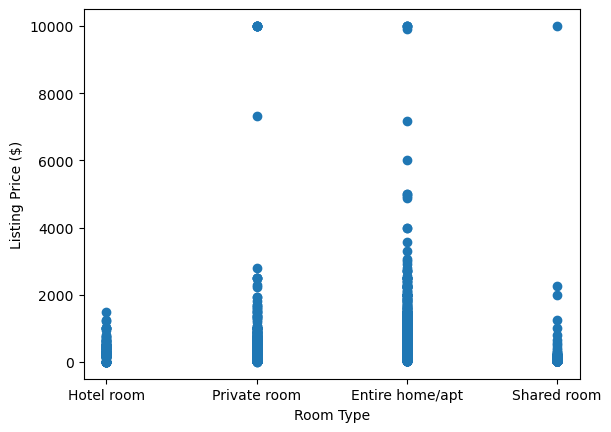

In [8]:
# Visually inspect the relationship between Room Type and Price:
plt.scatter(listings_df.room_type, listings_df.price)
plt.xlabel("Room Type")
plt.ylabel("Listing Price ($)")
plt.show()

In [9]:
# Create custom encoding for the boroughs
borough_num = {
   "Manhattan": 1,
   "Brooklyn": 2,
   "Queens": 3,
   "Bronx": 4,
   "Staten Island": 5,
}

listings_df["borough_num"] = listings_df["borough"].apply(lambda x: borough_num[x])
listings_df

,id,name,host_id,host_name,borough,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,availability_365,borough_num
0,77765,Superior @ Box House,417504,The Box House Hotel,Brooklyn,Greenpoint,40.737770,-73.953660,Hotel room,308,2,42,2022-07-18,217,2
1,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.645290,-73.972380,Private room,299,30,9,2018-10-19,356,2
2,45910,Beautiful Queens Brownstone! - 5BR,204539,Mark,Queens,Ridgewood,40.703090,-73.899630,Entire home/apt,425,30,13,2019-11-12,365,3
3,45936,Couldn't Be Closer To Columbia Uni,867225,Rahul,Manhattan,Morningside Heights,40.806300,-73.959850,Private room,75,31,135,2022-07-11,219,1
4,80493,Cozy room in East Village with AC,434987,Jennifer,Manhattan,East Village,40.723220,-73.986150,Private room,55,2,207,2022-08-13,132,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31500,628769808856889664,Two bedroom apartment in Hoboken New Jersey.,14468718,Burak,Manhattan,West Village,40.740227,-74.027504,Entire home/apt,410,3,2,2022-07-29,0,1
31501,27577588,Luxury Studio ON Grove Street E0C - B1CA,37412692,Kim,Manhattan,Ellis Island,40.718220,-74.037940,Entire home/apt,135,365,2,2019-09-16,365,1
31502,654151117629853651,Lovely 3- bedroom apartment,117540494,Miriam,Queens,Rosedale,40.647244,-73.720088,Entire home/apt,180,1,5,2022-08-24,0,3
31503,553754115911961053,Trendy 3-bedroom apartment near Manhattan,15048320,India,Manhattan,Upper West Side,40.787320,-74.004470,Entire home/apt,240,5,18,2022-08-22,152,1


In [10]:
# Encode neighborhood labels with Scikit-learn
le = LabelEncoder()
listings_df["neighborhood_num"] = le.fit_transform(listings_df["neighborhood"])
listings_df

,id,name,host_id,host_name,borough,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,availability_365,borough_num,neighborhood_num
0,77765,Superior @ Box House,417504,The Box House Hotel,Brooklyn,Greenpoint,40.737770,-73.953660,Hotel room,308,2,42,2022-07-18,217,2,104
1,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.645290,-73.972380,Private room,299,30,9,2018-10-19,356,2,122
2,45910,Beautiful Queens Brownstone! - 5BR,204539,Mark,Queens,Ridgewood,40.703090,-73.899630,Entire home/apt,425,30,13,2019-11-12,365,3,185
3,45936,Couldn't Be Closer To Columbia Uni,867225,Rahul,Manhattan,Morningside Heights,40.806300,-73.959850,Private room,75,31,135,2022-07-11,219,1,146
4,80493,Cozy room in East Village with AC,434987,Jennifer,Manhattan,East Village,40.723220,-73.986150,Private room,55,2,207,2022-08-13,132,1,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31500,628769808856889664,Two bedroom apartment in Hoboken New Jersey.,14468718,Burak,Manhattan,West Village,40.740227,-74.027504,Entire home/apt,410,3,2,2022-07-29,0,1,229
31501,27577588,Luxury Studio ON Grove Street E0C - B1CA,37412692,Kim,Manhattan,Ellis Island,40.718220,-74.037940,Entire home/apt,135,365,2,2019-09-16,365,1,74
31502,654151117629853651,Lovely 3- bedroom apartment,117540494,Miriam,Queens,Rosedale,40.647244,-73.720088,Entire home/apt,180,1,5,2022-08-24,0,3,191
31503,553754115911961053,Trendy 3-bedroom apartment near Manhattan,15048320,India,Manhattan,Upper West Side,40.787320,-74.004470,Entire home/apt,240,5,18,2022-08-22,152,1,221


In [11]:
# Create custom encoding for the room type
room_type_num = {
   "Entire home/apt": 1,
   "Private room": 2,
   "Shared room": 3,
   "Hotel room": 4,
}

listings_df["room_type_num"] = listings_df["room_type"].apply(lambda x: room_type_num[x])
listings_df

,id,name,host_id,host_name,borough,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,availability_365,borough_num,neighborhood_num,room_type_num
0,77765,Superior @ Box House,417504,The Box House Hotel,Brooklyn,Greenpoint,40.737770,-73.953660,Hotel room,308,2,42,2022-07-18,217,2,104,4
1,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.645290,-73.972380,Private room,299,30,9,2018-10-19,356,2,122,2
2,45910,Beautiful Queens Brownstone! - 5BR,204539,Mark,Queens,Ridgewood,40.703090,-73.899630,Entire home/apt,425,30,13,2019-11-12,365,3,185,1
3,45936,Couldn't Be Closer To Columbia Uni,867225,Rahul,Manhattan,Morningside Heights,40.806300,-73.959850,Private room,75,31,135,2022-07-11,219,1,146,2
4,80493,Cozy room in East Village with AC,434987,Jennifer,Manhattan,East Village,40.723220,-73.986150,Private room,55,2,207,2022-08-13,132,1,70,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31500,628769808856889664,Two bedroom apartment in Hoboken New Jersey.,14468718,Burak,Manhattan,West Village,40.740227,-74.027504,Entire home/apt,410,3,2,2022-07-29,0,1,229,1
31501,27577588,Luxury Studio ON Grove Street E0C - B1CA,37412692,Kim,Manhattan,Ellis Island,40.718220,-74.037940,Entire home/apt,135,365,2,2019-09-16,365,1,74,1
31502,654151117629853651,Lovely 3- bedroom apartment,117540494,Miriam,Queens,Rosedale,40.647244,-73.720088,Entire home/apt,180,1,5,2022-08-24,0,3,191,1
31503,553754115911961053,Trendy 3-bedroom apartment near Manhattan,15048320,India,Manhattan,Upper West Side,40.787320,-74.004470,Entire home/apt,240,5,18,2022-08-22,152,1,221,1


In [12]:
# Drop original columns
listings_df = listings_df.drop(["borough", "neighborhood", "room_type"], axis=1)
listings_df.head()

,id,name,host_id,host_name,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,availability_365,borough_num,neighborhood_num,room_type_num
0,77765,Superior @ Box House,417504,The Box House Hotel,40.73777,-73.95366,308,2,42,2022-07-18,217,2,104,4
1,2539,Clean & quiet apt home by the park,2787,John,40.64529,-73.97238,299,30,9,2018-10-19,356,2,122,2
2,45910,Beautiful Queens Brownstone! - 5BR,204539,Mark,40.70309,-73.89963,425,30,13,2019-11-12,365,3,185,1
3,45936,Couldn't Be Closer To Columbia Uni,867225,Rahul,40.80630,-73.95985,75,31,135,2022-07-11,219,1,146,2
4,80493,Cozy room in East Village with AC,434987,Jennifer,40.72322,-73.98615,55,2,207,2022-08-13,132,1,70,2


In [13]:
X = listings_df.room_type_num.values.reshape(-1, 1)
X[:5]
X.shape

(31505, 1)

In [14]:
y = listings_df.price

In [15]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(y_pred.shape)

(31505,)


### Random Forest